In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv("data/Hospital_Inpatient_Discharges.csv")

In [3]:
df.head(3)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,27,Emergency,Home w/ Home Health Services,2021,INF012,CORONAVIRUS DISEASE 2019 (COVID-19),OTR004,ISOLATION PROCEDURES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,4,Emergency,Home or Self Care,2021,NVS005,MULTIPLE SCLEROSIS,NaN,NaN,43,"MULTIPLE SCLEROSIS, OTHER DEMYELINATING DISEAS...",1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,2021,PRG016,PREVIOUS C-SECTION,PGN003,CESAREAN SECTION,540,CESAREAN SECTION WITHOUT STERILIZATION,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,2089497.0,4.990270e+06,2.234939e+06,101000.0,2951001.0,5902001.0,7002020.0,7004010.0
Permanent Facility Id,2090946.0,1.033841e+03,7.094093e+02,1.0,528.0,1045.0,1453.0,10355.0
Discharge Year,2101588.0,2.021000e+03,0.000000e+00,2021.0,2021.0,2021.0,2021.0,2021.0
APR DRG Code,2101588.0,4.141057e+02,2.442334e+02,1.0,194.0,383.0,640.0,956.0
APR MDC Code,2101588.0,1.028546e+01,5.961765e+00,0.0,5.0,9.0,15.0,25.0
APR Severity of Illness Code,2101588.0,2.122646e+00,9.556966e-01,0.0,1.0,2.0,3.0,4.0


In [6]:
df_clean = df.dropna()
df_clean.head(3)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
1015,Hudson Valley,Westchester,5904001.0,1072.0,Montefiore New Rochelle Hospital,0 to 17,108,M,Other Race,Spanish/Hispanic,2,Newborn,Home or Self Care,2021,PNL001,LIVEBORN,ADM010,VACCINATIONS,640,"NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,3000.0,N,"4,815.66","3,285.06"
1025,Hudson Valley,Westchester,5904001.0,1072.0,Montefiore New Rochelle Hospital,0 to 17,105,F,Black/African American,Unknown,1,Newborn,Home or Self Care,2021,PNL001,LIVEBORN,ADM010,VACCINATIONS,640,"NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,3700.0,N,"2,922.51","1,778.51"
1075,Hudson Valley,Westchester,5904001.0,1072.0,Montefiore New Rochelle Hospital,0 to 17,108,F,Other Race,Spanish/Hispanic,1,Newborn,Home or Self Care,2021,PNL001,LIVEBORN,ADM010,VACCINATIONS,640,"NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWB...",15,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,3200.0,N,"2,564.83","1,680.45"


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16004 entries, 1015 to 2101554
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital Service Area                16004 non-null  object 
 1   Hospital County                      16004 non-null  object 
 2   Operating Certificate Number         16004 non-null  float64
 3   Permanent Facility Id                16004 non-null  float64
 4   Facility Name                        16004 non-null  object 
 5   Age Group                            16004 non-null  object 
 6   Zip Code - 3 digits                  16004 non-null  object 
 7   Gender                               16004 non-null  object 
 8   Race                                 16004 non-null  object 
 9   Ethnicity                            16004 non-null  object 
 10  Length of Stay                       16004 non-null  object 
 11  Type of Admission      

In [8]:
# 1. Numara ve kimlik değerlerini string'e çevir
df['Operating Certificate Number'] = df['Operating Certificate Number'].astype(str)
df['Permanent Facility Id'] = df['Permanent Facility Id'].astype(str)

# 2. Kalış süresi sütununu integer yap
df['Length of Stay'] = df['Length of Stay'].str.extract(r'(\d+)')
df['Length of Stay'] = pd.to_numeric(df['Length of Stay']).astype('Int64')

# 3. Doğum ağırlığını float yap
df['Birth Weight'] = pd.to_numeric(df['Birth Weight'], errors='coerce')

# 4. Finansal sütunları float yap
df['Total Charges'] = df['Total Charges'].replace('[\$,]', '', regex=True).astype(float)
df['Total Costs'] = df['Total Costs'].replace('[\$,]', '', regex=True).astype(float)

# 5. Acil Durum İndikatörünü boolean yap
df['Emergency Department Indicator'] = df['Emergency Department Indicator'].map({'Y': True, 'N': False})

In [9]:
df["Length of Stay"].unique()

<IntegerArray>
[  27,    4,    2,    5,    3,    6,    1,   21,    7,    9,
 ...
   92,  107,   79,  101,   89,  110,  109,  105,  112, <NA>]
Length: 121, dtype: Int64

In [10]:
df.isna().sum()

Hospital Service Area                    10642
Hospital County                          10642
Operating Certificate Number                 0
Permanent Facility Id                        0
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      45062
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                           16384
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                       1634
CCSR Diagnosis Description                1634
CCSR Procedure Code                     576021
CCSR Procedure Description              576021
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [11]:
def unique_values_report(df):
    column_name_width = max(df.columns.str.len())
    print(f"{'Column Name':<{column_name_width}} {'Unique Values Count':>20}")
    print("-" * (column_name_width + 20))
    
    for column in df.columns:
        unique_count = df[column].nunique()
        print(f"{column:<{column_name_width}} {unique_count:>20}")
    
    print(f"\nSummary: Total Columns Analyzed: {len(df.columns)}")

In [12]:
unique_values_report(df)

Column Name                          Unique Values Count
-------------------------------------------------------
Hospital Service Area                                  8
Hospital County                                       57
Operating Certificate Number                         169
Permanent Facility Id                                206
Facility Name                                        205
Age Group                                              5
Zip Code - 3 digits                                   50
Gender                                                 3
Race                                                   4
Ethnicity                                              4
Length of Stay                                       120
Type of Admission                                      6
Patient Disposition                                   19
Discharge Year                                         1
CCSR Diagnosis Code                                  477
CCSR Diagnosis Description      

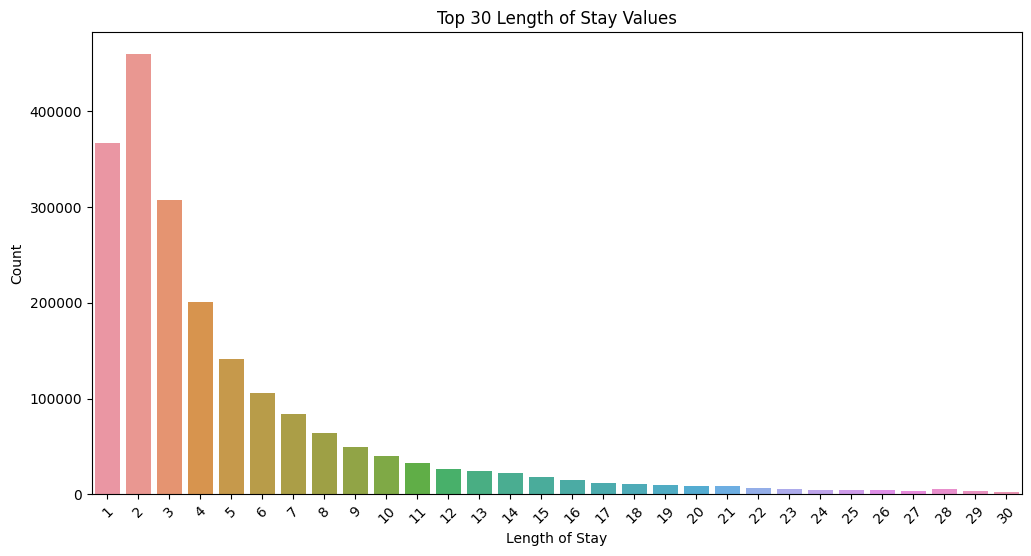

In [13]:
# LOS sütunundaki en fazla tekrar eden 30 değer
top_30_los = df['Length of Stay'].value_counts().nlargest(30)

# İlk 30 değeri görselleştirme
plt.figure(figsize=(12, 6))
sns.countplot(x='Length of Stay', data=df[df['Length of Stay'].isin(top_30_los.index)])

plt.title('Top 30 Length of Stay Values')
plt.xlabel('Length of Stay')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

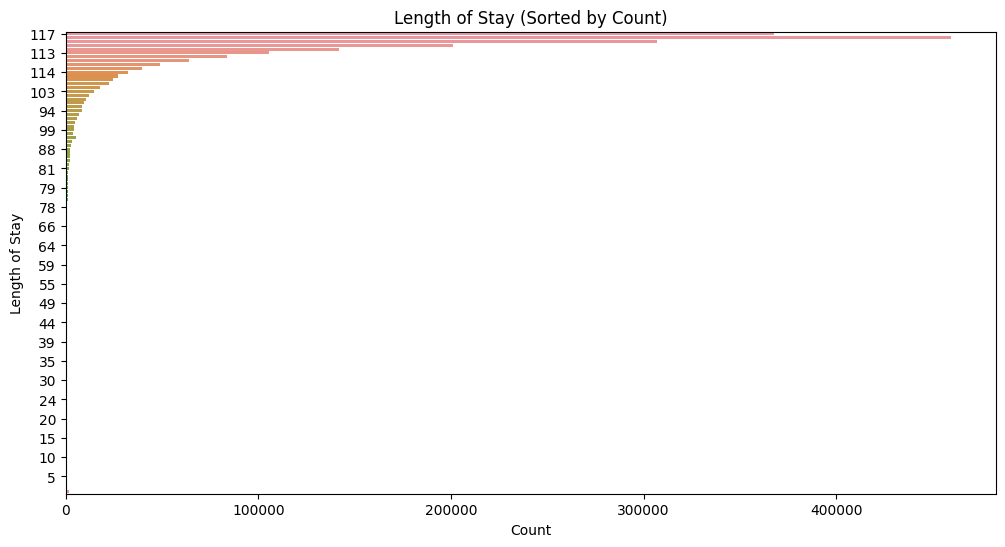

In [14]:
# Unique değerleri artan sırayla sıralamak
los_counts_sorted = df['Length of Stay'].value_counts().sort_values()

# Artan sırayla sıralanan değerleri görselleştirme
plt.figure(figsize=(12, 6))
sns.countplot(y='Length of Stay', data=df[df['Length of Stay'].isin(los_counts_sorted.index)])

# Etiketler her 5 tanede bir görünsün
plt.yticks(range(0, len(los_counts_sorted), 5), los_counts_sorted.index[::5], rotation=0)

plt.title('Length of Stay (Sorted by Count)')
plt.xlabel('Count')
plt.ylabel('Length of Stay')
plt.show()

In [15]:
# Sayısal sütunlar
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Pearson Korelasyonu
los_corr = df[numerical_cols].corr()['Length of Stay'].sort_values(ascending=False)

print("LOS ile diğer sayısal sütunlar arasındaki korelasyonlar:")
print(los_corr)

LOS ile diğer sayısal sütunlar arasındaki korelasyonlar:
Length of Stay                  1.000000
Total Charges                   0.675847
Total Costs                     0.675164
APR Severity of Illness Code    0.363796
APR MDC Code                    0.060856
APR DRG Code                    0.027303
Birth Weight                   -0.445252
Discharge Year                       NaN
Name: Length of Stay, dtype: float64


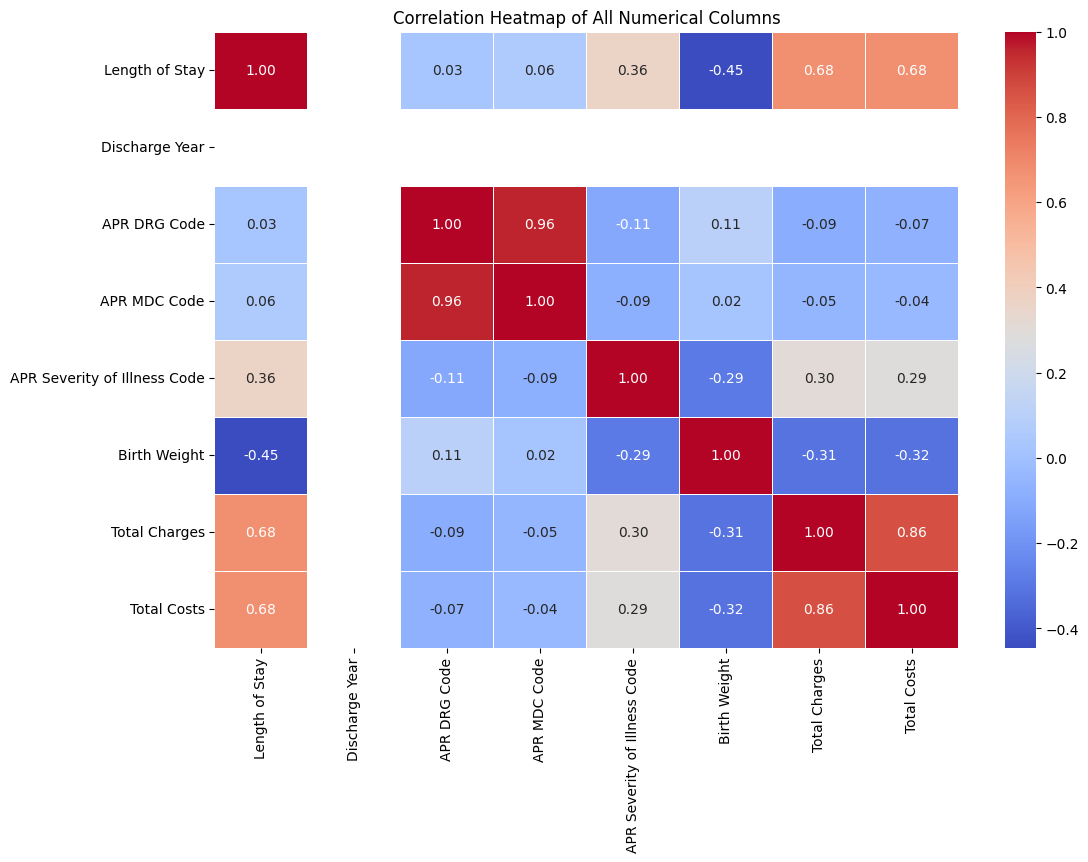

In [16]:
# Korelasyon matrisi
corr_matrix_all = df[numerical_cols].corr()

# Korelasyon matrisini heatmap olarak görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Numerical Columns')
plt.show()

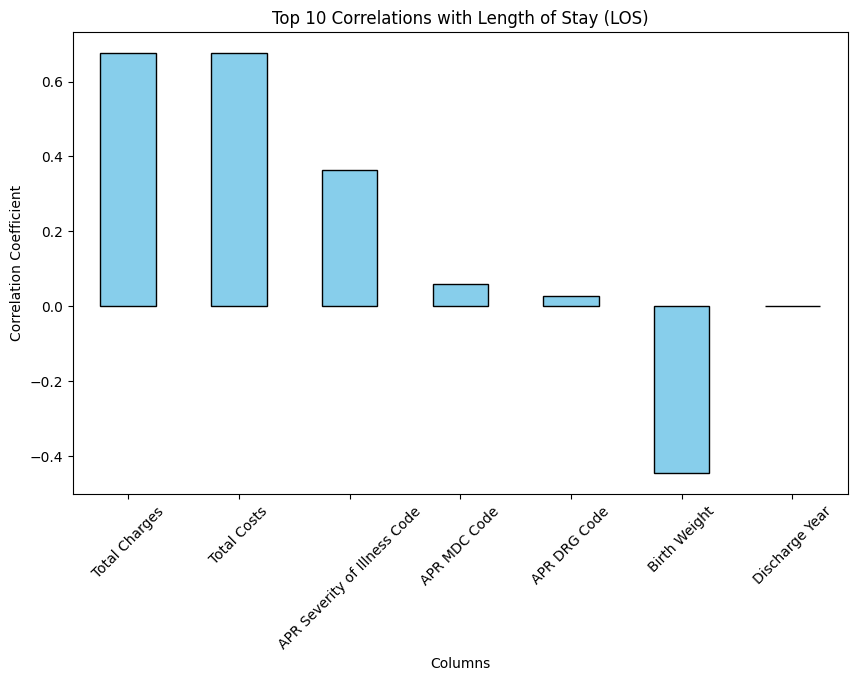

In [17]:
# LOS ile diğer sayısal sütunlar arasındaki korelasyon
los_corr = df[numerical_cols].corr()['Length of Stay'].sort_values(ascending=False)

# Sadece LOS ile en fazla korelasyonu olan 10 sütun
top_los_corr = los_corr.iloc[1:11]  

# Korelasyonları bar plot ile görselleştirme
plt.figure(figsize=(10, 6))
top_los_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Correlations with Length of Stay (LOS)')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

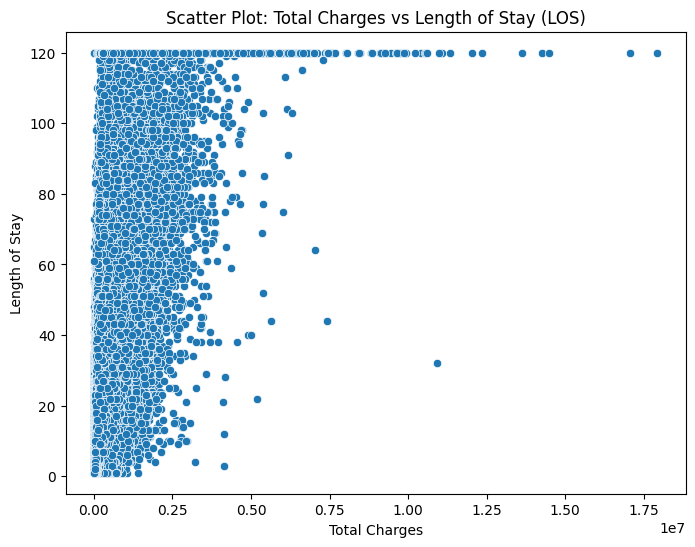

In [18]:
# LOS ile 'Total Charges' arasındaki scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Charges', y='Length of Stay', data=df)
plt.title('Scatter Plot: Total Charges vs Length of Stay (LOS)')
plt.xlabel('Total Charges')
plt.ylabel('Length of Stay')
plt.show()

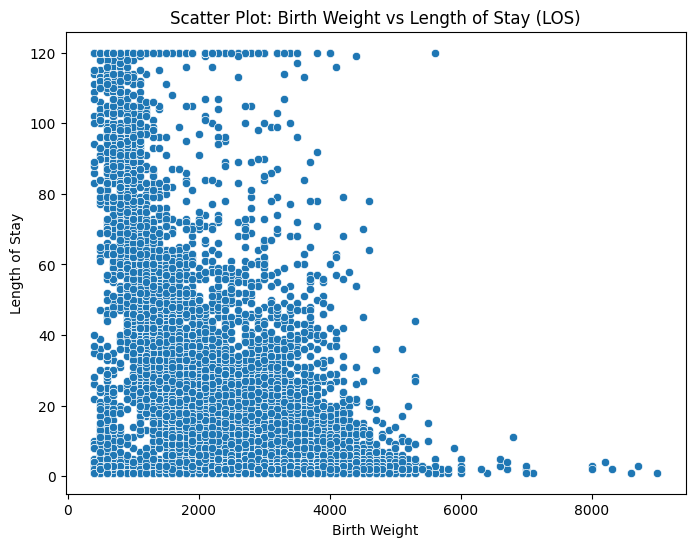

In [19]:
# LOS ile Birth Weight arasındaki scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Birth Weight', y='Length of Stay', data=df)
plt.title('Scatter Plot: Birth Weight vs Length of Stay (LOS)')
plt.xlabel('Birth Weight')
plt.ylabel('Length of Stay')
plt.show()

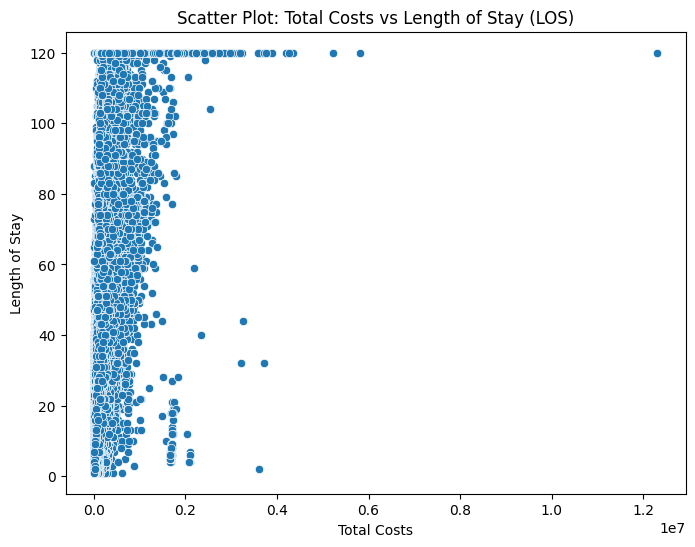

In [20]:
# LOS ile Total Costs arasındaki scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Costs', y='Length of Stay', data=df)
plt.title('Scatter Plot: Total Costs vs Length of Stay (LOS)')
plt.xlabel('Total Costs')
plt.ylabel('Length of Stay')
plt.show()

In [21]:
# Eksik CCSR Diagnosis Description satırlarını seçme
missing_ccsr = df[df['CCSR Diagnosis Description'].isna()]

# APR MDC Description mode değerinin tekrar sayısı
apr_mdc_mode = missing_ccsr['APR MDC Description'].mode()[0]
apr_mdc_count = missing_ccsr[missing_ccsr['APR MDC Description'] == apr_mdc_mode].shape[0]

# Type of Admission mode değerinin tekrar sayısı 
type_of_admission_mode = missing_ccsr['Type of Admission'].mode()[0]
type_of_admission_count = missing_ccsr[missing_ccsr['Type of Admission'] == type_of_admission_mode].shape[0]

# Sonuçları yazdırma
print(f"APR MDC mode değeri '{apr_mdc_mode}' eksik satırlarda {apr_mdc_count} kez geçiyor.")
print(f"Type of Admission mode değeri '{type_of_admission_mode}' eksik satırlarda {type_of_admission_count} kez geçiyor.")

APR MDC mode değeri 'PRE MDC' eksik satırlarda 1633 kez geçiyor.
Type of Admission mode değeri 'Emergency' eksik satırlarda 1373 kez geçiyor.


In [22]:
# APR MDC Description sütunu için 2. mode değeri
apr_mdc_second_mode = missing_ccsr['APR MDC Description'].value_counts().index[1]

# Type of Admission sütunu için 2. mode değeri
type_of_admission_second_mode = missing_ccsr['Type of Admission'].value_counts().index[1]

# 2. mode değerlerinin eksik satırlarda tekrar sayıları
apr_mdc_second_count = missing_ccsr[missing_ccsr['APR MDC Description'] == apr_mdc_second_mode].shape[0]
type_of_admission_second_count = missing_ccsr[missing_ccsr['Type of Admission'] == type_of_admission_second_mode].shape[0]

# Sonuçları yazdırma
print(f"APR MDC Description 2. mode değeri: {apr_mdc_second_mode} ({apr_mdc_second_count} kez geçiyor)")
print(f"Type of Admission 2. mode değeri: {type_of_admission_second_mode} ({type_of_admission_second_count} kez geçiyor)")

APR MDC Description 2. mode değeri: DISEASES AND DISORDERS OF THE NERVOUS SYSTEM (1 kez geçiyor)
Type of Admission 2. mode değeri: Elective (134 kez geçiyor)


In [23]:
# 'APR MDC Description' değeri 'PRE MDC' ve 'Type of Admission' değeri 'Emergency' olan satırları filtrele
filtered_df = df[(df['APR MDC Description'] == 'PRE MDC') & (df['Type of Admission'] == 'Emergency')]

# Bu filtrelenmiş veri setinde 'CCSR Diagnosis Description' sütununun mode değerini bulalım
ccsr_diagnosis_mode = filtered_df['CCSR Diagnosis Description'].mode()[0]
ccsr_diagnosis_mode

'SYSTEMIC LUPUS ERYTHEMATOSUS AND CONNECTIVE TISSUE DISORDERS'

In [24]:
df[df["CCSR Diagnosis Description"] == 'SYSTEMIC LUPUS ERYTHEMATOSUS AND CONNECTIVE TISSUE DISORDERS']["CCSR Diagnosis Code"].head(1)

904    MUS024
Name: CCSR Diagnosis Code, dtype: object

In [25]:
# Eksik olan CCSR Diagnosis Code satırlarını "MUS024" ile dolduruyoruz
df.loc[df['CCSR Diagnosis Code'].isna(), 'CCSR Diagnosis Code'] = 'MUS024'

In [26]:
# 'CCSR Procedure Code' sütununda en fazla tekrar eden 3 değeri ve bu değerlerin kaç satırda geçtiğini inceleyelim
ccsr_procedure_mode_counts = df['CCSR Procedure Code'].value_counts().head(3)
ccsr_procedure_mode_counts

PGN002    113332
PGN003     66856
ADM010     59487
Name: CCSR Procedure Code, dtype: int64

In [27]:
# Eksik CCSR Procedure Description satırlarını seçme
missing_ccsr = df[df['CCSR Procedure Description'].isna()]

# CCSR Diagnosis mode değerinin tekrar sayısı
ccsr_dgn_mode = missing_ccsr['CCSR Diagnosis Description'].mode()[0]
ccsr_dgn_count = missing_ccsr[missing_ccsr['CCSR Diagnosis Description'] == ccsr_dgn_mode].shape[0]

# APR MDC Description mode değerinin tekrar sayısı
apr_mdc_mode = missing_ccsr['APR MDC Description'].mode()[0]
apr_mdc_count = missing_ccsr[missing_ccsr['APR MDC Description'] == apr_mdc_mode].shape[0]

# Type of Admission mode değerinin tekrar sayısı
type_of_admission_mode = missing_ccsr['Type of Admission'].mode()[0]
type_of_admission_count = missing_ccsr[missing_ccsr['Type of Admission'] == type_of_admission_mode].shape[0]

# Sonuçları yazdırma
print(f"CCSR Diagnosis mode değeri '{ccsr_dgn_mode}' eksik satırlarda {ccsr_dgn_count} kez geçiyor.")
print(f"APR MDC mode değeri '{apr_mdc_mode}' eksik satırlarda {apr_mdc_count} kez geçiyor.")
print(f"Type of Admission mode değeri '{type_of_admission_mode}' eksik satırlarda {type_of_admission_count} kez geçiyor.")

CCSR Diagnosis mode değeri 'LIVEBORN' eksik satırlarda 60788 kez geçiyor.
APR MDC mode değeri 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM' eksik satırlarda 75315 kez geçiyor.
Type of Admission mode değeri 'Emergency' eksik satırlarda 468244 kez geçiyor.


In [28]:
# İlk koşul: 'CCSR Diagnosis Description' == 'LIVEBORN'
filtered_df1 = df[df['CCSR Diagnosis Description'] == 'LIVEBORN']
if not filtered_df1.empty:
    ccsr_procedure_mode1 = filtered_df1['CCSR Procedure Description'].mode()[0]
    ccsr_procedure_count1 = filtered_df1[filtered_df1['CCSR Procedure Description'] == ccsr_procedure_mode1].shape[0]
    print(f"1. Koşul (CCSR Diagnosis Description == 'LIVEBORN'): Mode değer: {ccsr_procedure_mode1}, tekrar sayısı: {ccsr_procedure_count1}")
else:
    print("1. Koşul (CCSR Diagnosis Description == 'LIVEBORN') sonucu boş veri seti.")

# İkinci koşul: 'Type of Admission' == 'Emergency'
filtered_df2 = df[df['Type of Admission'] == 'Emergency']
if not filtered_df2.empty:
    ccsr_procedure_mode2 = filtered_df2['CCSR Procedure Description'].mode()[0]
    ccsr_procedure_count2 = filtered_df2[filtered_df2['CCSR Procedure Description'] == ccsr_procedure_mode2].shape[0]
    print(f"2. Koşul (Type of Admission == 'Emergency'): Mode değer: {ccsr_procedure_mode2}, tekrar sayısı: {ccsr_procedure_count2}")
else:
    print("2. Koşul (Type of Admission == 'Emergency') sonucu boş veri seti.")

# Üçüncü koşul: 'APR MDC Description' == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM'
filtered_df3 = df[df['APR MDC Description'] == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM']
if not filtered_df3.empty:
    ccsr_procedure_mode3 = filtered_df3['CCSR Procedure Description'].mode()[0]
    ccsr_procedure_count3 = filtered_df3[filtered_df3['CCSR Procedure Description'] == ccsr_procedure_mode3].shape[0]
    print(f"3. Koşul (APR MDC Description == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM'): Mode değer: {ccsr_procedure_mode3}, tekrar sayısı: {ccsr_procedure_count3}")
else:
    print("3. Koşul (APR MDC Description == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM') sonucu boş veri seti.")

# Şimdi tüm koşulların birleşimini tekrar kontrol edelim
filtered_df_all_conditions = df[(df['CCSR Diagnosis Description'] == 'LIVEBORN') & 
                                 (df['Type of Admission'] == 'Emergency') & 
                                 (df['APR MDC Description'] == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM')]

if not filtered_df_all_conditions.empty:
    ccsr_procedure_mode_all = filtered_df_all_conditions['CCSR Procedure Description'].mode()[0]
    ccsr_procedure_count_all = filtered_df_all_conditions[filtered_df_all_conditions['CCSR Procedure Description'] == ccsr_procedure_mode_all].shape[0]
    print(f"Tüm koşulların birleşimi için Mode değer: {ccsr_procedure_mode_all}, tekrar sayısı: {ccsr_procedure_count_all}")
else:
    print("Tüm koşulların birleşimi sonucu boş veri seti.")

1. Koşul (CCSR Diagnosis Description == 'LIVEBORN'): Mode değer: VACCINATIONS, tekrar sayısı: 57218
2. Koşul (Type of Admission == 'Emergency'): Mode değer: POTENTIAL COVID-19 THERAPIES, tekrar sayısı: 44465
3. Koşul (APR MDC Description == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM'): Mode değer: PERCUTANEOUS CORONARY INTERVENTIONS (PCI), tekrar sayısı: 21746
Tüm koşulların birleşimi sonucu boş veri seti.


In [29]:
df['CCSR Procedure Description'].mode()

0    SPONTANEOUS VAGINAL DELIVERY
Name: CCSR Procedure Description, dtype: object

In [30]:
df[df["CCSR Procedure Description"] == 'VACCINATIONS']["CCSR Procedure Code"].head(1) 

7    ADM010
Name: CCSR Procedure Code, dtype: object

In [31]:
df[df["CCSR Procedure Description"] == 'POTENTIAL COVID-19 THERAPIES']["CCSR Diagnosis Code"].head(1) 

31    INF012
Name: CCSR Diagnosis Code, dtype: object

In [32]:
df[df["CCSR Procedure Description"] == 'PERCUTANEOUS CORONARY INTERVENTIONS (PCI)']["CCSR Procedure Code"].head(1) 

35    CAR004
Name: CCSR Procedure Code, dtype: object

In [33]:
# 'LIVEBORN' tanısı ve 'CCSR Procedure Description' null olan satırlarda, CCSR Procedure Description'ı VACCINATIONS olarak atama
df.loc[(df['CCSR Diagnosis Description'] == 'LIVEBORN') & (df['CCSR Procedure Description'].isna()), 'CCSR Procedure Code'] = 'ADM010'

# 'Emergency' admission tipi ve 'CCSR Procedure Description' null olan satırlarda, CCSR Procedure Description'ı POTENTIAL COVID-19 THERAPIES olarak atama
df.loc[(df['Type of Admission'] == 'Emergency') & (df['CCSR Procedure Description'].isna()), 'CCSR Procedure Code'] = 'NVS005'

# 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM' ve 'CCSR Procedure Description' null olan satırlarda, CCSR Procedure Description'ı PERCUTANEOUS CORONARY INTERVENTIONS (PCI) olarak atama
df.loc[(df['APR MDC Description'] == 'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM') & (df['CCSR Procedure Description'].isna()), 'CCSR Procedure Code'] = 'CAR004'

In [34]:
# APR Risk of Mortality sütununun en fazla tekrar eden 3 değerini ve tekrar sayısını görmek
apr_risk_of_mortality_mode = df['APR Risk of Mortality'].mode()[:3]
apr_risk_of_mortality_counts = df['APR Risk of Mortality'].value_counts().head(3)

apr_risk_of_mortality_mode, apr_risk_of_mortality_counts

(0    Minor
 Name: APR Risk of Mortality, dtype: object,
 Minor       1068879
 Moderate     437286
 Major        394486
 Name: APR Risk of Mortality, dtype: int64)

In [35]:
# 'APR Risk of Mortality' sütunu 'Minor' olan satırları filtreleyelim
minor_risk_df = df[df['APR Risk of Mortality'] == 'Minor']

# İlgili sütunlar üzerinde en fazla tekrar eden 3 değeri ve sıklıklarını bulalım
columns_of_interest = ['APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Medical Surgical Description']

# Her bir sütun için en fazla tekrar eden 3 değeri ve kaç satırda geçtiğini gösterelim
for col in columns_of_interest:
    print(f"\nMost frequent 3 values for column: {col}")
    top_values = minor_risk_df[col].value_counts().head(3)
    print(top_values)


Most frequent 3 values for column: APR DRG Description
NEONATE BIRTH WEIGHT > 2499 GRAMS, NORMAL NEWBORN OR NEONATE WITH OTHER PROBLEM    171942
VAGINAL DELIVERY                                                                   119948
CESAREAN SECTION WITHOUT STERILIZATION                                              57284
Name: APR DRG Description, dtype: int64

Most frequent 3 values for column: APR MDC Description
PREGNANCY, CHILDBIRTH AND THE PUERPERIUM                                           208469
NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD    196734
DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE         100112
Name: APR MDC Description, dtype: int64

Most frequent 3 values for column: APR Severity of Illness Description
Minor       590865
Moderate    421824
Major        55225
Name: APR Severity of Illness Description, dtype: int64

Most frequent 3 values for column: APR Medical Surgical Description
Medical     77

In [36]:
# 'APR Risk of Mortality' sütunu 'Moderate' olan satırları filtreleyelim
moderate_risk_df = df[df['APR Risk of Mortality'] == 'Moderate']

# İlgili sütunlar üzerinde en fazla tekrar eden 3 değeri ve sıklıklarını bulalım
columns_of_interest = ['APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Medical Surgical Description']

# Her bir sütun için en fazla tekrar eden 3 değeri ve kaç satırda geçtiğini gösterelim
for col in columns_of_interest:
    print(f"\nMost frequent 3 values for column: {col}")
    top_values = moderate_risk_df[col].value_counts().head(3)
    print(top_values)


Most frequent 3 values for column: APR DRG Description
MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS    16911
SEPTICEMIA AND DISSEMINATED INFECTIONS            16753
HEART FAILURE                                     15228
Name: APR DRG Description, dtype: int64

Most frequent 3 values for column: APR MDC Description
DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM    77781
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM    48954
DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM      46284
Name: APR MDC Description, dtype: int64

Most frequent 3 values for column: APR Severity of Illness Description
Moderate    263334
Major       126540
Minor        44047
Name: APR Severity of Illness Description, dtype: int64

Most frequent 3 values for column: APR Medical Surgical Description
Medical     341106
Surgical     96180
Name: APR Medical Surgical Description, dtype: int64


In [37]:
# 'APR Risk of Mortality' sütunu 'Major' olan satırları filtreleyelim
major_risk_df = df[df['APR Risk of Mortality'] == 'Major']

# İlgili sütunlar üzerinde en fazla tekrar eden 3 değeri ve sıklıklarını bulalım
columns_of_interest = ['APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description', 'APR Medical Surgical Description']

# Her bir sütun için en fazla tekrar eden 3 değeri ve kaç satırda geçtiğini gösterelim
for col in columns_of_interest:
    print(f"\nMost frequent 3 values for column: {col}")
    top_values = major_risk_df[col].value_counts().head(3)
    print(top_values)


Most frequent 3 values for column: APR DRG Description
MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS    49804
SEPTICEMIA AND DISSEMINATED INFECTIONS            34764
HEART FAILURE                                     24802
Name: APR DRG Description, dtype: int64

Most frequent 3 values for column: APR MDC Description
DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM                     90513
DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM                     76720
INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)    43928
Name: APR MDC Description, dtype: int64

Most frequent 3 values for column: APR Severity of Illness Description
Major       274135
Moderate     74514
Extreme      42543
Name: APR Severity of Illness Description, dtype: int64

Most frequent 3 values for column: APR Medical Surgical Description
Medical     331848
Surgical     62638
Name: APR Medical Surgical Description, dtype: int64


In [38]:
df.loc[(df['APR Severity of Illness Description'] == 'Major') & 
       df['APR Risk of Mortality'].isna(), 'APR Risk of Mortality'] = 'Major'

df.loc[(df['APR Severity of Illness Description'] == 'Moderate') & 
       df['APR Risk of Mortality'].isna(), 'APR Risk of Mortality'] = 'Moderate'

df.loc[(df['APR Severity of Illness Description'] == 'Minor') & 
       df['APR Risk of Mortality'].isna(), 'APR Risk of Mortality'] = 'Minor'

In [39]:
df.drop(columns=[
    'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
    'CCSR Diagnosis Description', 'CCSR Procedure Description',
    'Zip Code - 3 digits', 'APR Severity of Illness Description',
    'Hospital Service Area', 'Hospital County', 'Operating Certificate Number',
    'Permanent Facility Id', 'Facility Name',
    'Discharge Year', 'APR DRG Description', 'APR MDC Description'
], inplace=True)

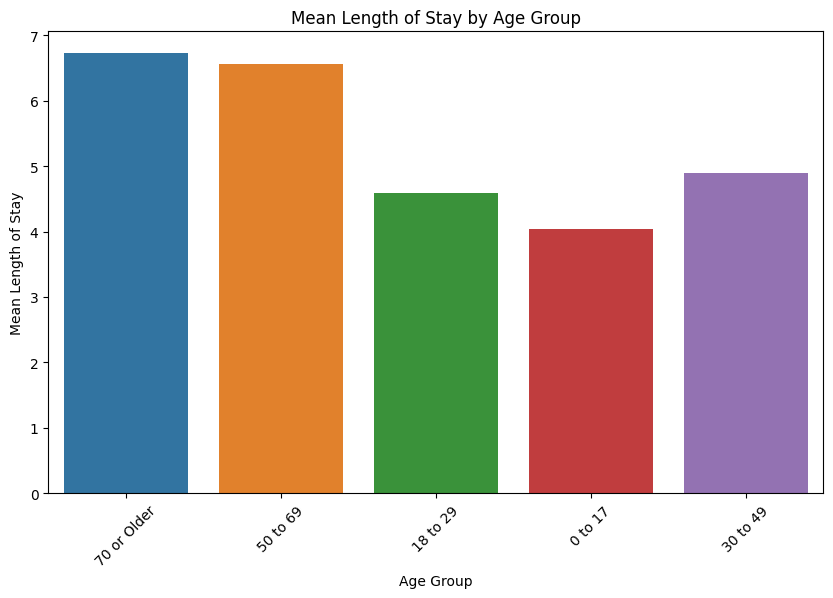

In [40]:
# 'Age Group' için bar grafiği
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Length of Stay', data=df, estimator='mean', ci=None)
plt.title('Mean Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Length of Stay')
plt.xticks(rotation=45)
plt.show()

In [41]:
unique_values_report(df)

Column Name                       Unique Values Count
----------------------------------------------------
Age Group                                           5
Gender                                              3
Race                                                4
Ethnicity                                           4
Length of Stay                                    120
Type of Admission                                   6
Patient Disposition                                19
CCSR Diagnosis Code                               477
CCSR Procedure Code                               321
APR DRG Code                                      334
APR MDC Code                                       26
APR Severity of Illness Code                        5
APR Risk of Mortality                               4
APR Medical Surgical Description                    3
Payment Typology 1                                  9
Emergency Department Indicator                      2
Total Charges                

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Age Group                         object 
 1   Gender                            object 
 2   Race                              object 
 3   Ethnicity                         object 
 4   Length of Stay                    Int64  
 5   Type of Admission                 object 
 6   Patient Disposition               object 
 7   CCSR Diagnosis Code               object 
 8   CCSR Procedure Code               object 
 9   APR DRG Code                      int64  
 10  APR MDC Code                      int64  
 11  APR Severity of Illness Code      int64  
 12  APR Risk of Mortality             object 
 13  APR Medical Surgical Description  object 
 14  Payment Typology 1                object 
 15  Emergency Department Indicator    bool   
 16  Total Charges                     fl

In [43]:
df.isna().sum()

Age Group                               0
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                      16384
Type of Admission                       0
Patient Disposition                     0
CCSR Diagnosis Code                     0
CCSR Procedure Code                 43065
APR DRG Code                            0
APR MDC Code                            0
APR Severity of Illness Code            0
APR Risk of Mortality                2550
APR Medical Surgical Description        0
Payment Typology 1                      0
Emergency Department Indicator          0
Total Charges                           0
Total Costs                             0
dtype: int64

In [44]:
age_group_index = {"0 to 17": 1, "18 to 29": 2, "30 to 49": 3, "50 to 69": 4, "70 or Older": 5}
gender_index = {"U": 0, "F": 1, "M": 2}
risk_and_severity_index = {np.nan: 0, "Minor": 1, "Moderate": 2, "Major": 3, "Extreme": 4}

In [45]:
df["Age Group"] = df["Age Group"].map(age_group_index)
df["Gender"] = df["Gender"].map(gender_index)
df["APR Risk of Mortality"] = df["APR Risk of Mortality"].map(risk_and_severity_index)

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

encoder = OneHotEncoder(sparse=False)
encoder = LabelEncoder()

df["Patient Disposition"] = encoder.fit_transform(df["Patient Disposition"])
df["Race"] = encoder.fit_transform(np.asarray(df["Race"]).reshape(-1, 1))
df["Ethnicity"] = encoder.fit_transform(np.asarray(df["Ethnicity"]).reshape(-1, 1))
df["Type of Admission"] = encoder.fit_transform(np.asarray(df["Type of Admission"]).reshape(-1, 1))
df["CCSR Diagnosis Code"] = encoder.fit_transform(np.asarray(df["CCSR Diagnosis Code"]).reshape(-1, 1))
df["CCSR Procedure Code"] = encoder.fit_transform(np.asarray(df["CCSR Procedure Code"]).reshape(-1, 1))
df["APR Medical Surgical Description"] = encoder.fit_transform(np.asarray(df["APR Medical Surgical Description"]).reshape(-1, 1))
df["Payment Typology 1"] = encoder.fit_transform(np.asarray(df["Payment Typology 1"]).reshape(-1, 1))
df["Emergency Department Indicator"] = encoder.fit_transform(np.asarray(df["Emergency Department Indicator"]).reshape(-1, 1))

In [47]:
df.head()

,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,5,2,2,2,27,1,8,154,254,137,4,3,4,0,5,1,320922.43,60241.34
1,4,1,3,1,4,1,7,377,250,43,1,2,1,0,7,1,61665.22,9180.69
2,2,1,2,2,2,1,7,423,258,540,14,1,1,2,4,0,42705.34,11366.50
3,5,2,2,2,5,1,7,121,16,463,11,3,3,0,5,1,72700.17,12111.75
4,4,1,0,1,3,1,7,380,52,58,1,2,1,0,5,1,55562.51,8339.72


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Age Group                         int64  
 1   Gender                            int64  
 2   Race                              int32  
 3   Ethnicity                         int32  
 4   Length of Stay                    Int64  
 5   Type of Admission                 int32  
 6   Patient Disposition               int32  
 7   CCSR Diagnosis Code               int32  
 8   CCSR Procedure Code               int32  
 9   APR DRG Code                      int64  
 10  APR MDC Code                      int64  
 11  APR Severity of Illness Code      int64  
 12  APR Risk of Mortality             int64  
 13  APR Medical Surgical Description  int32  
 14  Payment Typology 1                int32  
 15  Emergency Department Indicator    int64  
 16  Total Charges                     fl

In [49]:
df["CCSR Procedure Code"].isna().sum()

0

In [50]:
df["APR Risk of Mortality"].isna().sum()

0

In [51]:
df["Length of Stay"].isna().sum()

16384

In [52]:
# LOS değeri boş olanları ayır
los_nan_df = df[df["Length of Stay"].isna()].copy()

# LOS değeri boş olmayanları ayır (model eğitimi için kullanılacak veri seti)
df = df[df["Length of Stay"].notna()].copy()

print(f"Boş LOS kayıt sayısı: {los_nan_df.shape[0]}")
print(f"Eğitim verisindeki kayıt sayısı: {df.shape[0]}")

Boş LOS kayıt sayısı: 16384
Eğitim verisindeki kayıt sayısı: 2085204


In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Length of Stay"]) 
y = df["Length of Stay"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train boyutu: {X_train.shape}")
print(f"X_test boyutu: {X_test.shape}")

X_train boyutu: (1668163, 17)
X_test boyutu: (417041, 17)


In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Decision Tree modelini eğit
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Test veri setinde tahmin yap ve performansı değerlendir
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = dt_model.score(X_test, y_test)

print(f"Decision Tree MSE: {mse:.2f}")
print(f"Decision Tree R²: {r2:.2f}")

Decision Tree MSE: 24.46
Decision Tree R²: 0.66


In [58]:
# Eksik LOS değerlerini, oluşturduğumuz Decision Tree algoritması ile tahmin et
X_nan = los_nan_df.drop(columns=["Length of Stay"])
los_nan_df.drop(columns=["Length of Stay"], inplace=True)
los_nan_df["Length of Stay"] = dt_model.predict(X_nan)

In [59]:
los_nan_df.head()

,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCSR Diagnosis Code,CCSR Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs,Length of Stay
737280,1,1,2,2,2,7,395,9,640,15,2,1,0,4,0,44220.46,10870.55,3.0
737281,5,1,2,2,1,13,26,20,201,5,1,1,0,5,1,22294.50,3910.49,1.0
737282,1,2,0,1,2,7,395,74,640,15,2,1,0,0,0,15726.17,3748.11,1.0
737283,1,2,0,1,2,7,395,74,640,15,2,1,0,0,0,29576.17,7231.76,2.0
737284,5,2,3,1,1,8,144,44,720,18,4,4,0,5,1,108938.83,25428.99,8.0
